**currentMVPS.csv last updated at the end of the 2021-2022 NBA Regular Season**

Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

Read currentMVPRace.csv and pastMVPS.csv

In [2]:
currentMVPs = pd.read_csv('Data/currentMVPRace.csv')
pastMVPS = pd.read_csv('Data/pastMVPS.csv')

Split the data into a random train and test set (80% => training data, 20% => testing data)

In [3]:
train, test = train_test_split(pastMVPS, test_size=0.2, random_state=5)

Xtrain = train[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytrain = train[['Share']]
Xtest = test[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytest = test[['Share']]

Perform Random Forest Regression to figure out feature importance

In [4]:
RF = RandomForestRegressor(random_state = 100, criterion = 'mse')

In [5]:
RF.fit(Xtrain, Ytrain.values.ravel())
prediction = RF.predict(Xtest)
sorted = RF.feature_importances_.argsort()

Plot feature importance

Text(0.5, 0.98, 'Feature Importance')

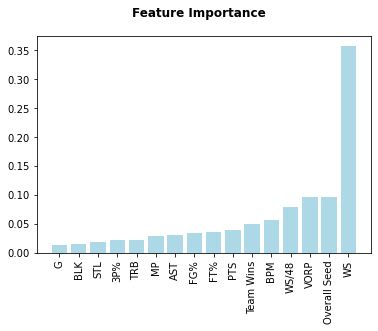

In [6]:
plt.bar(Xtrain.columns[sorted], RF.feature_importances_[sorted], color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("Feature Importance", weight = 'bold')

**Remove:**
- G => Weakest feature
- MP => Practically not important
- FT% => There have been many MVP winners with terrible FT%
- Team Wins => Overall Seed is a better feature
- BPM => VORP is a better feature
- WS/48 => WS is a better feature

Split the important features into a random train and test set (80% => training data, 20% => testing data)

In [7]:
train, test = train_test_split(pastMVPS, test_size=0.2, random_state=5)

Xtrain = train[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]
Ytrain = train[['Share']]
Xtest = test[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]
Ytest = test[['Share']]

Select important features from the current MVP race

In [8]:
currentMVPs.head(10)

,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,VORP,BPM
0,1,Nikola Jokić,27,DEN,74,48,11,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296,9.8,13.7
1,2,Giannis Antetokounmpo,27,MIL,67,51,7,32.9,29.9,11.6,5.8,1.1,1.4,0.553,0.293,0.722,12.9,0.281,7.4,11.2
2,3,Joel Embiid,28,PHI,68,51,8,33.8,30.6,11.7,4.2,1.1,1.5,0.499,0.371,0.814,12.0,0.252,6.5,9.2
3,4,Chris Paul,36,PHO,65,64,1,32.9,14.7,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,4.0,5.4
4,5,Luka Dončić,23,DAL,65,52,5,35.4,28.4,9.1,8.7,1.2,0.6,0.457,0.353,0.744,7.6,0.159,5.9,8.2
5,6,James Harden,32,PHI,65,51,8,37.2,22.0,7.7,10.3,1.3,0.6,0.410,0.330,0.877,7.6,0.152,3.7,4.1
6,7,Devin Booker,25,PHO,68,64,1,34.5,26.8,5.0,4.8,1.1,0.4,0.466,0.383,0.868,7.6,0.156,3.6,4.1
7,8,Rudy Gobert,29,UTA,66,49,9,32.1,15.6,14.7,1.1,0.7,2.1,0.713,0.000,0.690,11.7,0.264,3.6,4.6
8,9,Trae Young,23,ATL,76,43,16,34.9,28.4,3.7,9.7,0.9,0.1,0.460,0.382,0.904,10.0,0.181,4.8,5.2
9,10,Jayson Tatum,24,BOS,76,51,6,35.9,26.9,8.0,4.4,1.0,0.6,0.453,0.353,0.853,9.6,0.169,4.8,4.9


In [9]:
currentMVPNames = currentMVPs.iloc[:,1]
currentMVPs = currentMVPs[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]

### KNN

In [10]:
KNN = neighbors.KNeighborsRegressor(
    n_neighbors=9,
    weights='uniform'
)

In [11]:
KNN.fit(Xtrain, Ytrain.values.ravel())

KNeighborsRegressor(n_neighbors=9)

In [12]:
KNNCurrentMVPsPrediction = KNN.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, KNNCurrentMVPsPrediction):
    print(i, j)

Nikola Jokić 0.30844444444444447
Giannis Antetokounmpo 0.18555555555555556
Joel Embiid 0.23277777777777775
Chris Paul 0.18977777777777777
Luka Dončić 0.2641111111111111
James Harden 0.01577777777777778
Devin Booker 0.15588888888888885
Rudy Gobert 0.0641111111111111
Trae Young 0.0788888888888889
Jayson Tatum 0.155


Text(0.5, 0.98, 'KNN Prediction MVP Share')

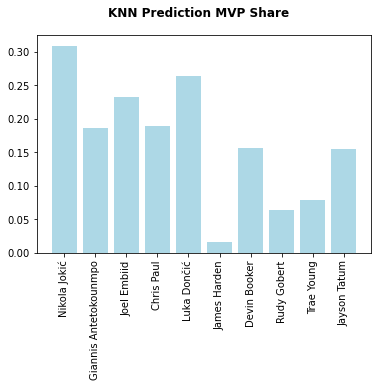

In [13]:
plt.bar(currentMVPNames, KNNCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("KNN Prediction MVP Share", weight = 'bold')

### MLP

In [14]:
MLP = MLPRegressor(
    solver='adam',
    activation='relu',
    learning_rate ='invscaling',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=5
)

In [15]:
MLP.fit(Xtrain, Ytrain.values.ravel())

MLPRegressor(hidden_layer_sizes=100, learning_rate='invscaling', max_iter=10000,
             random_state=5)

In [16]:
MLPCurrentMVPsPrediction = MLP.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, MLPCurrentMVPsPrediction):
    print(i, j)

Nikola Jokić 0.26052043200759445
Giannis Antetokounmpo 0.2949378356679233
Joel Embiid 0.2399984532980426
Chris Paul 0.14880981412946004
Luka Dončić 0.2534632756213082
James Harden 0.008942125105884768
Devin Booker 0.5734625851281092
Rudy Gobert 0.12913537799968322
Trae Young -0.14663641108758818
Jayson Tatum 0.15524608727110945


Text(0.5, 0.98, 'MLP Prediction MVP Share')

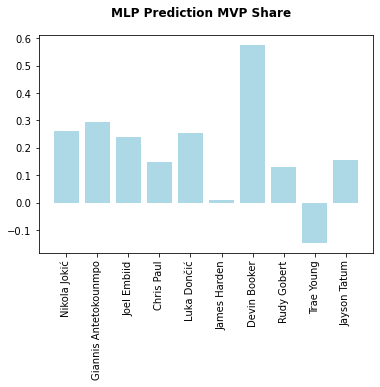

In [17]:
plt.bar(currentMVPNames, MLPCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("MLP Prediction MVP Share", weight = 'bold')

### RF

In [18]:
RF = RandomForestRegressor(random_state = 100, criterion = 'mse')

In [19]:
RF.fit(Xtrain, Ytrain.values.ravel())

RandomForestRegressor(random_state=100)

In [20]:
RFCurrentMVPsPrediction = RF.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, RFCurrentMVPsPrediction):
    print(i, j)

Nikola Jokić 0.37671000000000016
Giannis Antetokounmpo 0.27767
Joel Embiid 0.28801999999999983
Chris Paul 0.12914999999999993
Luka Dončić 0.22891000000000017
James Harden 0.013759999999999993
Devin Booker 0.14204
Rudy Gobert 0.13731000000000002
Trae Young 0.19044999999999998
Jayson Tatum 0.17211000000000007


Text(0.5, 0.98, 'RF Prediction MVP Share')

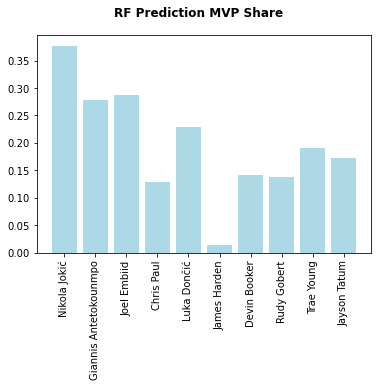

In [21]:
plt.bar(currentMVPNames, RFCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("RF Prediction MVP Share", weight = 'bold')

### XG Boost Regressor

In [22]:
XGBR = XGBRegressor(random_state = 100)

In [23]:
XGBR.fit(Xtrain, Ytrain.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
XGBRCurrentMVPsPrediction = XGBR.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, XGBRCurrentMVPsPrediction):
    print(i, j)

Nikola Jokić 0.23714885115623474
Giannis Antetokounmpo 0.25997981429100037
Joel Embiid 0.4259296953678131
Chris Paul 0.09345170110464096
Luka Dončić 0.32424041628837585
James Harden -0.01915055327117443
Devin Booker 0.1662326604127884
Rudy Gobert 0.07233820855617523
Trae Young 0.06731928884983063
Jayson Tatum 0.1626904159784317


Text(0.5, 0.98, 'XG Boost Regressor Prediction MVP Share')

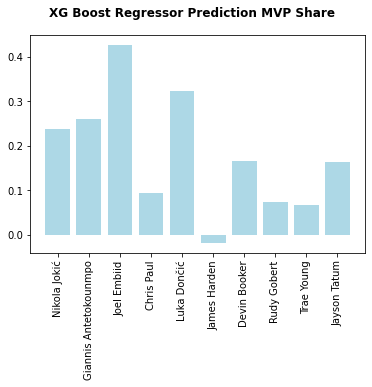

In [25]:
plt.bar(currentMVPNames, XGBRCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("XG Boost Regressor Prediction MVP Share", weight = 'bold')

### Mean

In [26]:
mean = []

for (i, j, k, l) in zip(KNNCurrentMVPsPrediction, MLPCurrentMVPsPrediction, RFCurrentMVPsPrediction, XGBRCurrentMVPsPrediction):
    mean.append((i + j + k + l) / 4)
    
for (i, j) in zip(currentMVPNames, mean):
    print(i, j)

Nikola Jokić 0.29570593190206845
Giannis Antetokounmpo 0.2545358013786198
Joel Embiid 0.29668148161090835
Chris Paul 0.14029732325296967
Luka Dončić 0.26768120075519886
James Harden 0.004832337403122028
Devin Booker 0.25940603360744663
Rudy Gobert 0.1007236744167424
Trae Young 0.04750544166278283
Jayson Tatum 0.16126162581238532


Text(0.5, 0.98, 'Mean Prediction MVP Share')

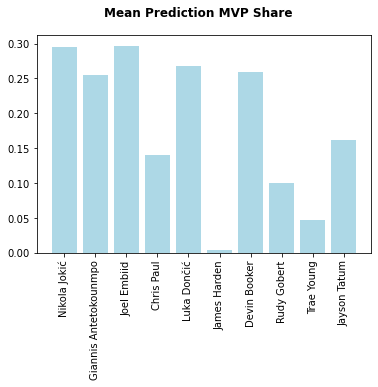

In [27]:
plt.bar(currentMVPNames, mean, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("Mean Prediction MVP Share", weight = 'bold')